**EMOTION DETECTION OF TWEET REPLIES TO THE RWANDA'S OFFICE OF THE PM**

This is a logistic regression model trained on a pre- processed dataset that contains tweets with their associated emotions. this model can be applied on retrieved tweet mentions of a governmental organization in Rwanda to know how the public is receiving different policy implementations/communications,etc... and get a general idea of the emotions and attitude regarding particular decisions,policies, events,etc..


For the purpose of showing how the model would be applied, I used replies to the office of the prime minister. predicted emotions on tweet replies based on the trained model and made a visualisiation of the summary of the prevalent emotions
 



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
import os
import tweepy as tw

In [8]:
consumer_key= 'upWs4iRLt7GNdelig0uZr7OCw'
consumer_secret= 'zDbYOrPwbVERyskPG71Dz11JIDSTHvMd0olswowdim5RJOiAdM'
access_token= '918560003639971842-u3G6jdMhnO6ItaBK3Tlmu2aehPIY2RI'
access_token_secret= 'G0tUiNkIk3kiAdKk2p5rM7UIo9qxKC5kFv5x1zMiamgfS'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [31]:
#retrieving tweets mentioning one of the Rwandan government institutions twitter account, in this case i used the office of the prime minister(@PrimatureRwanda)
# since they have been giving a lot of updates, these tweets will be analysed to know the sentiment of the feedback that their communications/publications have
#been getting in view of these events

mentioned_account = " to:PrimatureRwanda -filter:retweets"
date_since = "2018-11-16"

tweets = tw.Cursor(api.search, 
                           q=mentioned_account,
                           lang="en",
                           since=date_since).items(50)
tweets_text = [[tweet.text] for tweet in tweets]
tweets_text

#i only retrieved 50 tweets for now to not reach the limit fast


[['@PrimatureRwanda Congratulations Hon Alfred GASANA.  Wish only the best ahead'],
 ['@PrimatureRwanda Hhhhhhh PM signing on behalf of invisible HE PK!!!'],
 ['@PrimatureRwanda Cngz to Mr Alfred Gasana'],
 ['@PrimatureRwanda @Muhangadis Congratulations to Mr Gasana Alfred'],
 ['@PrimatureRwanda @clnizeyimana Congratulations Mr Alfred Gasana. You will make it comrade'],
 ['@PrimatureRwanda Minister of Interior?'],
 ['@PrimatureRwanda Either you are not aware or maybe the consequences are not that alarming but such documents have a… https://t.co/7Cc3mVBSGF'],
 ['@PrimatureRwanda 0pppppppppppppppppp\nlppppppppp\nP0ll'],
 ['@PrimatureRwanda What a beautiful meeting room! Iyi meeting room iduhesha ishema.'],
 ["@PrimatureRwanda Sabin. I'm sure u're going to be given an abroad mission. Please make sure vaccins are well produc… https://t.co/nzgCfRmtj2"],
 ['@PrimatureRwanda @RwandaGov SUSPENDED and NOT DISMISSED..there is a big difference between the 2 words. Also it is… https://t.co/vJTbWCx

In [32]:
tweet_text = pd.DataFrame(data = tweets_text, 
                    columns=["text"])
tweet_text


,text
0,@PrimatureRwanda Congratulations Hon Alfred GA...
1,@PrimatureRwanda Hhhhhhh PM signing on behalf ...
2,@PrimatureRwanda Cngz to Mr Alfred Gasana
3,@PrimatureRwanda @Muhangadis Congratulations t...
4,@PrimatureRwanda @clnizeyimana Congratulations...
5,@PrimatureRwanda Minister of Interior?
6,@PrimatureRwanda Either you are not aware or m...
7,@PrimatureRwanda 0pppppppppppppppppp\nlppppppp...
8,@PrimatureRwanda What a beautiful meeting room...
9,@PrimatureRwanda Sabin. I'm sure u're going to...


In [33]:
import re
def tweets_cleaner(text):
  text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
  text = re.sub('#', '', text) # Removing '#' hash tag
  text = re.sub('RT[\s]+', '', text) # Removing RT
  text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink

  return text
tweet_text['text'] = tweet_text['text'].apply(tweets_cleaner)
tweet_text


,text
0,Congratulations Hon Alfred GASANA. Wish only...
1,Hhhhhhh PM signing on behalf of invisible HE ...
2,Cngz to Mr Alfred Gasana
3,Congratulations to Mr Gasana Alfred
4,Congratulations Mr Alfred Gasana. You will m...
5,Minister of Interior?
6,Either you are not aware or maybe the consequ...
7,0pppppppppppppppppp\nlppppppppp\nP0ll
8,What a beautiful meeting room! Iyi meeting ro...
9,Sabin. I'm sure u're going to be given an abr...


In [38]:
#I will now create a logistic regression prediction model based on a preprocessed tweets- emotions dataset that was created for sentiment analysis

#loading the libraries for the model development
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

emotions_dataset = pd.read_csv("https://raw.githubusercontent.com/Jcharis/end2end-nlp-project/main/data/emotion_dataset_2.csv")
emotions_dataset


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [59]:
emotions_dataset.isnull().sum()


Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [61]:
#replace the missing data with empty space
emotions_dataset.fillna('', inplace=True)


In [62]:
#the distribution of the data 
emotions_dataset['Emotion'].value_counts()



joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [63]:
x_features = emotions_dataset['Clean_Text']
y_labels = emotions_dataset['Emotion']

#splitting the data in the training set and validation/testing set
x_train,x_val,y_train,y_val = train_test_split(x_features,y_labels,test_size=0.3,random_state=42)


In [64]:
#building the ml model pipeline
from sklearn.pipeline import Pipeline
log_regr_pl = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])



In [65]:
#fitting it to the training dataset
log_regr_pl.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [66]:
log_regr_pl.score(x_val,y_val)

0.622341444721211

In [68]:
#appling this model to the extracted tweets
tweet_text['emotions pred'] = log_regr_pl.predict(tweet_text['text'])
tweet_text



,text,emotions pred
0,Congratulations Hon Alfred GASANA. Wish only...,joy
1,Hhhhhhh PM signing on behalf of invisible HE ...,neutral
2,Cngz to Mr Alfred Gasana,joy
3,Congratulations to Mr Gasana Alfred,joy
4,Congratulations Mr Alfred Gasana. You will m...,joy
5,Minister of Interior?,neutral
6,Either you are not aware or maybe the consequ...,sadness
7,0pppppppppppppppppp\nlppppppppp\nP0ll,neutral
8,What a beautiful meeting room! Iyi meeting ro...,joy
9,Sabin. I'm sure u're going to be given an abr...,joy


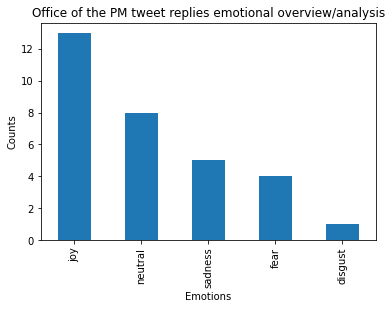

In [70]:
#visualising the distribution of the emotions identified in tweet replies/ feedback  that the office of the prime minister got on their recent publications

import matplotlib.pyplot as plt


plt.title('Office of the PM tweet replies emotional overview/analysis')
plt.xlabel('Emotions')
plt.ylabel('Counts')
tweet_text['emotions pred'].value_counts().plot(kind = 'bar')
plt.show()

In [72]:
# saving the model 
import joblib 
pipeline_file = open("tweets_emotions_classifier.pkl", mode = "wb") 
joblib.dump(log_regr_pl, pipeline_file) 
pipeline_file.close()